Copyright (c) 2017-2018 [Serpent-Tools developer team](https://github.com/CORE-GATECH-GROUP/serpent-tools/graphs/contributors), GTRC

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# `DepletionReader`

## Basic Operation

This notebook demonstrates the capabilities of the [`serpentTools`](https://github.com/CORE-GATECH-GROUP/serpent-tools) in regards to reading depleted material files. SERPENT [1] produces a [burned material file](http://serpent.vtt.fi/mediawiki/index.php/Description_of_output_files#Burnup_calculation_output), containing the evolution of material properties through burnup for all burned materials present in the problem. 
The `DepletionReader` is capable of reading this file, and storing the data inside `DepletedMaterial` objects.
Each such object has methods and attributes that should ease analysis.

In [1]:
%matplotlib inline
import six
import serpentTools
from serpentTools.settings import rc

In [2]:
depFile = 'demo_dep.m'
dep = serpentTools.read(depFile)

The materials read in from the file are stored in the `materials` dictionary, where the keys represent the name of specific materials, and the corresponding values are the depleted material.

In [3]:
dep.materials

{'bglass0': <serpentTools.objects.materials.DepletedMaterial at 0x7fb17664c940>,
 'fuel0': <serpentTools.objects.materials.DepletedMaterial at 0x7fb17664c0f0>,
 'total': <serpentTools.objects.materials.DepletedMaterial at 0x7fb17664cd30>}

Metadata, such as the isotopic vector and depletion schedule are also present inside the reader

In [4]:
dep.metadata.keys()

dict_keys(['zai', 'names', 'burnup', 'days'])

In [5]:
dep.metadata['burnup']

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
       0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  , 1.02, 1.04, 1.06, 1.08,
       1.1 , 1.12, 1.14, 1.16, 1.18, 1.2 , 1.22, 1.24, 1.26, 1.28, 1.3 ,
       1.32, 1.34, 1.36, 1.38, 1.4 , 1.42])

In [6]:
dep.metadata['names']

['Xe135',
 'I135',
 'U234',
 'U235',
 'U236',
 'U238',
 'Pu238',
 'Pu239',
 'Pu240',
 'Pu241',
 'Pu242',
 'Np237',
 'Am241',
 'Am243',
 'Cm243',
 'Cm244',
 'Cm245',
 'Cs133',
 'Nd143',
 'Sm147',
 'Sm149',
 'Sm150',
 'Sm151',
 'Sm152',
 'Eu153',
 'Gd155',
 'Mo95',
 'Tc99',
 'Ru101',
 'Rh103',
 'Ag109',
 'Cd113',
 'lost',
 'total']

## DepletedMaterial
As mentioned before, all the material data is stored inside these `DepletedMaterial` objects. These objects share access to the metadata as well.

In [7]:
fuel = dep.materials['fuel0']
print(fuel.burnup)
print(fuel.days is dep.metadata['days'])

[0.         0.00702676 0.0144405  0.0218803  0.0297245  0.0370823
 0.0447201  0.0513465  0.0590267  0.0671439  0.073392   0.0802637
 0.0887954  0.0974604  0.104807   0.111528   0.119688   0.128006
 0.135704   0.143491   0.150545   0.157608   0.165391   0.172872
 0.180039   0.188011   0.195215   0.202291   0.20963    0.216895
 0.224651   0.232139   0.23904    0.246076   0.25422    0.262011
 0.269681   0.276981   0.284588   0.291835   0.299661   0.30727
 0.314781   0.322364   0.329404   0.336926   0.34438    0.352246
 0.360913   0.367336   0.37415    0.381556   0.388951   0.396286
 0.404159   0.412113   0.419194   0.426587   0.43425    0.442316
 0.449562   0.456538   0.465128   0.472592   0.479882   0.487348
 0.494634   0.502167   0.508326   0.515086   0.522826   0.530643  ]
True


All of the variables present in the depletion file for this material are present, stored in the `data` dictionary.
A few properties commonly used are accessible as attributes as well.

In [8]:
fuel.data.keys()

dict_keys(['volume', 'burnup', 'adens', 'mdens', 'a', 'h', 'sf', 'gsrc', 'ingTox', 'inhTox'])

In [9]:
print(fuel.adens)
print(fuel.adens is fuel.data['adens'])

[[0.00000e+00 2.43591e-09 4.03796e-09 ... 4.70133e-09 4.70023e-09
  4.88855e-09]
 [0.00000e+00 6.06880e-09 8.11783e-09 ... 8.05991e-09 8.96359e-09
  9.28554e-09]
 [4.48538e-06 4.48486e-06 4.48432e-06 ... 4.44726e-06 4.44668e-06
  4.44611e-06]
 ...
 [0.00000e+00 3.03589e-11 7.38022e-11 ... 1.62829e-09 1.63566e-09
  1.64477e-09]
 [0.00000e+00 1.15541e-14 2.38378e-14 ... 8.60736e-13 8.73669e-13
  8.86782e-13]
 [6.88332e-02 6.88334e-02 6.88336e-02 ... 6.88455e-02 6.88457e-02
  6.88459e-02]]
True


Similar to the original file, the rows of the matrix correspond to positions in the isotopic vector, and the columns correspond to positions in burnup/day vectors.

In [10]:
print(fuel.mdens.shape)  # rows, columns
print(fuel.burnup.shape)
print(len(fuel.names))

(34, 72)
(72,)
34


## Data Retrieval
At the heart of the `DepletedMaterial` object is the `getValues` method. This method acts as an slicing mechanism that returns data for a select number of isotopes at select points in time. `getValues` requires two arguments for the units of time requested, e.g. `days` or `burnup`, and the name of the data requested. This second value must be a key in the `data` dictionary. 

Specific days or values of burnup can be passed with the `timePoints` keyword. This will instruct the slicing tool to retrieve data that corresponds to values of `days` or `burnup` in the `timePoints` list. By default the method returns data for every time point on the material unless `timePoints` is given. Similarly, one can pass a string or list of strings as the `names` argument and obtain data for those specific isotopes. Data for every isotope is given if `names` is not given.

In [11]:
dayPoints = [0, 5, 10, 30]
iso = ['Xe135', 'Sm149']
vals = fuel.getValues('days', 'a', dayPoints, iso)
print(vals.shape)
print(vals)

(2, 4)
[[0.00000e+00 3.28067e+14 3.24606e+14 3.27144e+14]
 [0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]]


The `DepletedMaterial` uses this slicing for the built in `plot` routine. `plot` takes the same slicing arguments as `getValues`, and includes some optional formatting arguments.

In addition, the `labelFmt` argument can be used to apply a consistent label to each unique plot. This argument supports [brace-delimited formatting](https://docs.python.org/3/library/stdtypes.html?#str.format), and will automatically replace strings like `{mat}` with the name of the material. The table below contains the special strings and their replacements

|String|Replacement|
|-|-|
|`'mat'`|Name of the material|
|`'iso'`|Name of the isotope, e.g. `'U235'`|
|`'zai'`|ZZAAAI of the isotope, e.g. 922350|

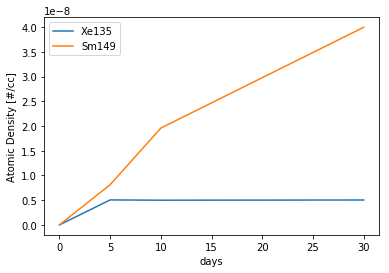

In [12]:
fuel.plot('days', 'adens', dayPoints, iso, 
          ylabel='Atomic Density [#/cc]');

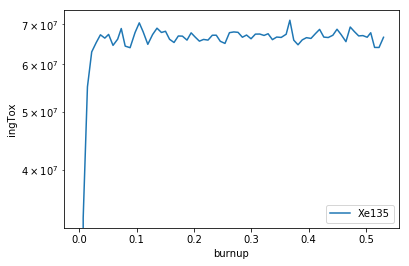

In [13]:
fuel.plot('burnup', 'ingTox', names='Xe135', logy=True,
          labelFmt="{iso}");

This type of plotting can also be applied to the `DepletedMaterial` level, with similar options for formatting and retrieving data. The materials to be plotted can be filtered using the `materials` argument.

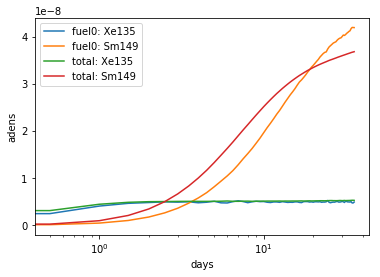

In [14]:
dep.plot('days', 'adens', names=iso, 
         materials=['fuel0', 'total'],
         labelFmt="{mat}: {iso}", logy=True);

## Limitations
Currently, the `DepletionReader` cannot catch materials with underscore in the name, due to variables like `ING_TOX` also containing underscore. This is currently an open issue [#58](https://github.com/CORE-GATECH-GROUP/serpent-tools/issues/58)

## Settings
The `DepletionReader` also has a collection of settings to control what data is stored. If none of these settings are modified, the default is to store all the data from the output file.

In [15]:
from serpentTools.settings import rc, defaultSettings
for setting in defaultSettings:
    if 'depletion' in setting:
        print(setting)
        for k, v in six.iteritems(defaultSettings[setting]):
            print('\t', k, v)

depletion.metadataKeys
	 default ['ZAI', 'NAMES', 'DAYS', 'BU']
	 options default
	 description Non-material data to store, i.e. zai, isotope names, burnup schedule, etc.
	 type <class 'list'>
depletion.materialVariables
	 default []
	 description Names of variables to store. Empty list -> all variables.
	 type <class 'list'>
depletion.materials
	 default []
	 description Names of materials to store. Empty list -> all materials.
	 type <class 'list'>
depletion.processTotal
	 default True
	 description Option to store the depletion data from the TOT block
	 type <class 'bool'>


Below is an example of configuring a `DepletionReader` that only stores the burnup days, and atomic density for all materials that begin with `bglass` followed by at least one integer.

Note: Creating the ``DepletionReader`` in this manner is functionally equivalent to serpentTools.read(depFile)

In [16]:
rc['depletion.processTotal'] = False
rc['depletion.metadataKeys'] = ['BU']
rc['depletion.materialVariables'] = ['ADENS']
rc['depletion.materials'] = [r'bglass\d+']

bgReader = serpentTools.parsers.DepletionReader(depFile)
bgReader.read()

In [17]:
bgReader.materials.keys()

dict_keys(['bglass0'])

In [18]:
bglass = bgReader.materials['bglass0']
bglass.data.keys()

dict_keys(['adens'])

## Conclusion
The `DepletionReader` is capable of reading and storing all the data from the SERPENT burned materials file. Upon reading, the reader creates custom `DepletedMaterial` objects that are responsible for storing and retrieving the data. These objects also have a handy `plot` method for quick analysis. Use of the `rc` settings control object allows increased control over the data selected from the output file.

## References
1. J. Leppänen, M. Pusa, T. Viitanen, V. Valtavirta, and T. Kaltiaisenaho. "The Serpent Monte Carlo code: Status, development and applications in 2013." Ann. Nucl. Energy, [82 (2015) 142-150](https://www.sciencedirect.com/science/article/pii/S0306454914004095)